Homework **#4** for course **Machine Learning for Data Analysis**
## Running a k-means Cluster Analysis

### Import required libraries

In [38]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi 

### Loading data

In [39]:
data = pd.read_csv("addhealth.csv")
data.columns = map(str.upper, data.columns)
data_clean = data.dropna()
data_clean.dtypes
data_clean.describe()

,BIO_SEX,HISPANIC,WHITE,BLACK,NAMERICAN,ASIAN,AGE,TREG1,ALCEVR1,ALCPROBS1,...,ESTEEM1,VIOL1,PASSIST,DEVIANT1,SCHCONN1,GPA1,EXPEL1,FAMCONCT,PARACTV,PARPRES
count,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,...,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000
mean,1.521093,0.111038,0.683279,0.236066,0.036284,0.040437,16.493052,0.176393,0.527432,0.369180,...,40.952131,1.618579,0.102514,2.645027,28.360656,2.815647,0.040219,22.570557,6.290710,13.398033
std,0.499609,0.314214,0.465249,0.424709,0.187017,0.197004,1.552174,0.381196,0.499302,0.894947,...,5.381439,2.593230,0.303356,3.520554,5.156385,0.770167,0.196493,2.614754,3.360219,2.085837
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.676712,0.000000,0.000000,0.000000,...,18.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.000000,6.300000,0.000000,3.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.254795,0.000000,0.000000,0.000000,...,38.000000,0.000000,0.000000,0.000000,25.000000,2.250000,0.000000,21.700000,4.000000,12.000000
50%,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,16.509589,0.000000,1.000000,0.000000,...,40.000000,0.000000,0.000000,1.000000,29.000000,2.750000,0.000000,23.700000,6.000000,14.000000
75%,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,17.679452,0.000000,1.000000,0.000000,...,45.000000,2.000000,0.000000,4.000000,32.000000,3.500000,0.000000,24.300000,9.000000,15.000000
max,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.512329,1.000000,1.000000,6.000000,...,50.000000,19.000000,1.000000,27.000000,38.000000,4.000000,1.000000,25.000000,18.000000,15.000000


### Select predictor variables and target variable, standartize data

In [40]:
target = data_clean.TREG1

cluster = data_clean[['ALCEVR1','MAREVER1','DEVIANT1','FAMCONCT', 'PARACTV', 'SCHCONN1', 'ALCPROBS1','VIOL1',
'DEP1','ESTEEM1','PARPRES']]
cluster.describe()

clustervar = cluster.copy()
clustervar['ALCEVR1'] = preprocessing.scale(clustervar['ALCEVR1'].astype('float64'))
clustervar['MAREVER1'] = preprocessing.scale(clustervar['MAREVER1'].astype('float64'))
clustervar['DEVIANT1'] = preprocessing.scale(clustervar['DEVIANT1'].astype('float64'))
clustervar['FAMCONCT'] = preprocessing.scale(clustervar['FAMCONCT'].astype('float64'))
clustervar['PARACTV'] = preprocessing.scale(clustervar['PARACTV'].astype('float64'))
clustervar['SCHCONN1'] = preprocessing.scale(clustervar['SCHCONN1'].astype('float64'))
clustervar['ALCPROBS1'] = preprocessing.scale(clustervar['ALCPROBS1'].astype('float64'))
clustervar['VIOL1'] = preprocessing.scale(clustervar['VIOL1'].astype('float64'))
clustervar['DEP1'] = preprocessing.scale(clustervar['DEP1'].astype('float64'))
clustervar['ESTEEM1'] = preprocessing.scale(clustervar['ESTEEM1'].astype('float64'))
clustervar['PARPRES'] = preprocessing.scale(clustervar['PARPRES'].astype('float64'))

clus_train, clus_test = train_test_split(clustervar, test_size=0.3, random_state=3456)

clusters=range(1,10)
meandist=[]

### k-means analysis

In [41]:
for k in range(1,10):
    model=KMeans(n_clusters=k)
    model.fit(clus_train)
    prediction = model.predict(clus_train)
    meandist.append(sum(np.min(cdist(clus_train, model.cluster_centers_, 'euclidean'), axis=1)))

### Selecting k

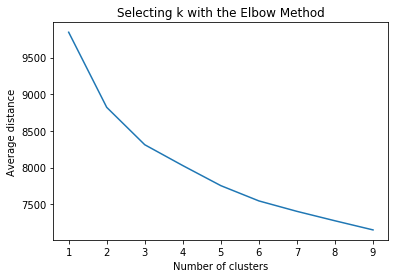

In [42]:
plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method')
plt.show()

### k = 3

In [43]:
model3 = KMeans(n_clusters=3)
model3.fit(clus_train)
clusassign = model3.predict(clus_train)

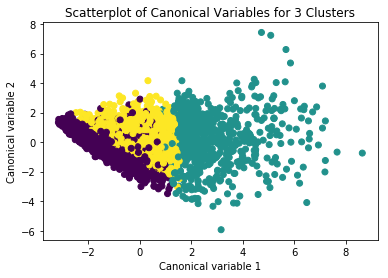

In [44]:
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(clus_train)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=model3.labels_,)
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.title('Scatterplot of Canonical Variables for 3 Clusters')
plt.show()

### Merging cluster assignment with clustering variables to examine cluster variable means by cluster

In [45]:
clus_train.reset_index(level=0, inplace=True)
cluslist=list(clus_train['index'])
labels=list(model3.labels_)
newlist=dict(zip(cluslist, labels))

In [46]:
newclus=DataFrame.from_dict(newlist, orient='index')
newclus.columns = ['cluster']
newclus.describe()

,cluster
count,3202.000000
mean,0.888819
std,0.884879
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,2.000000


### Calculate clustering variable means by cluster

In [47]:
newclus.reset_index(level=0, inplace=True)
merged_train=pd.merge(clus_train, newclus, on='index')
merged_train.head(n=100)
merged_train.cluster.value_counts()

0    1451
2    1095
1     656
Name: cluster, dtype: int64

In [48]:
clustergrp = merged_train.groupby('cluster').mean()
print ("Clustering variable means by cluster")
print(clustergrp)

Clustering variable means by cluster
               index   ALCEVR1  MAREVER1  DEVIANT1  FAMCONCT   PARACTV  \
cluster                                                                  
0        3288.939352 -1.056455 -0.476475 -0.458701  0.303122  0.101777   
1        3175.618902  0.680918  1.139960  1.173491 -0.862978 -0.353305   
2        3344.515068  0.946562 -0.097991 -0.126163  0.180394  0.095044   

         SCHCONN1  ALCPROBS1     VIOL1      DEP1   ESTEEM1   PARPRES  
cluster                                                               
0        0.334535  -0.412562 -0.278962 -0.277049  0.188721  0.148190  
1       -0.890418   1.008171  0.886676  0.848162 -0.638726 -0.488327  
2        0.122233  -0.075779 -0.193480 -0.149429  0.136356  0.067939  


### Validating clusters in training data by examining cluster differences in GPA using ANOVA

In [49]:
gpa_data=data_clean['GPA1']
gpa_train, gpa_test = train_test_split(gpa_data, test_size=.3, random_state=3456)
gpa_train1=pd.DataFrame(gpa_train)
gpa_train1.reset_index(level=0, inplace=True)
merged_train_all=pd.merge(gpa_train1, merged_train, on='index')
sub1 = merged_train_all[['GPA1', 'cluster']].dropna()

In [50]:
gpamod = smf.ols(formula='GPA1 ~ C(cluster)', data=sub1).fit()
print (gpamod.summary())

                            OLS Regression Results                            
Dep. Variable:                   GPA1   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     144.1
Date:                Mon, 19 Feb 2018   Prob (F-statistic):           1.16e-60
Time:                        02:01:06   Log-Likelihood:                -3571.0
No. Observations:                3202   AIC:                             7148.
Df Residuals:                    3199   BIC:                             7166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.9947      0.019    1

In [51]:
print ('means for GPA by cluster')
m1= sub1.groupby('cluster').mean()
print (m1)

means for GPA by cluster
             GPA1
cluster          
0        2.994659
1        2.405869
2        2.839574


In [52]:
print ('standard deviations for GPA by cluster')
m2= sub1.groupby('cluster').std()
print (m2)

standard deviations for GPA by cluster
             GPA1
cluster          
0        0.737537
1        0.775745
2        0.716408


In [53]:
mc1 = multi.MultiComparison(sub1['GPA1'], sub1['cluster'])
res1 = mc1.tukeyhsd()
print(res1.summary())

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  0      1    -0.5888  -0.6703 -0.5073  True 
  0      2    -0.1551  -0.2244 -0.0858  True 
  1      2     0.4337   0.3482  0.5192  True 
---------------------------------------------
